## Uploading the Data

In [75]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Data Reading

In [76]:
import pandas as pd

lunar = pd.read_csv('LunarEclipse.csv')

lunar.info()
lunar['Eclipse Type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            7241 non-null   int64  
 1   Month                           7241 non-null   int64  
 2   Day                             7241 non-null   int64  
 3   Hours                           7241 non-null   int64  
 4   Minutes                         7241 non-null   int64  
 5   Seconds                         7241 non-null   int64  
 6   Delta T (s)                     7241 non-null   int64  
 7   Lunation Number                 7241 non-null   int64  
 8   Saros Number                    7241 non-null   int64  
 9   Eclipse Type                    7241 non-null   int64  
 10  Gamma                           7241 non-null   float64
 11  Penumbral Magnitude             7241 non-null   float64
 12  Umbral Magnitude                72

5    2536
1    2398
6     850
8     621
7     614
4      88
3      68
2      66
Name: Eclipse Type, dtype: int64

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(lunar, test_size = 0.3, random_state = 42)

print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

Rows in train set: 5068
Rows in test set: 2173


## Stratified Shuffle Split

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

splitData = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

for train_indices, test_indices in splitData.split(lunar, lunar['Eclipse Type']):
    strat_train_set = lunar.loc[train_indices]
    strat_test_set = lunar.loc[test_indices]

print(f'Stratified Train Set: {len(strat_train_set)}\nStratified Test Set: {len(strat_test_set)}')

Stratified Train Set: 5068
Stratified Test Set: 2173


## Correlations

In [79]:
correlation_matrix = lunar.corr()

sn = correlation_matrix['Saros Number'].sort_values(ascending = False)
et = correlation_matrix['Eclipse Type'].sort_values(ascending = False)
gm = correlation_matrix['Gamma'].sort_values(ascending = False)

print(f'Correlation with Saros Number:\n{sn}')
print(f'\nCorrelation with Eclipse Type:\n{et}')
print(f'\nCorrelation with Gamma:\n{gm}')

Correlation with Saros Number:
Saros Number                      1.000000
Lunation Number                   0.911838
Year                              0.911821
Month                             0.048683
Minutes                           0.009826
Latitude                          0.006158
Day                               0.004833
Gamma                             0.000276
Seconds                          -0.000094
Penumbral Magnitude              -0.002698
Umbral Magnitude                 -0.002921
Longitude                        -0.003325
Penumbral Eclipse Duration (m)   -0.004837
Eclipse Type                     -0.007774
Hours                            -0.012655
Delta T (s)                      -0.550892
Name: Saros Number, dtype: float64

Correlation with Eclipse Type:
Eclipse Type                      1.000000
Umbral Magnitude                  0.926155
Penumbral Magnitude               0.926018
Penumbral Eclipse Duration (m)    0.820428
Seconds                           0.023717

## Train Features & Train Labels

In [80]:
lunar_features = strat_train_set.drop(['Saros Number', 'Eclipse Type', 'Gamma'], axis = 1)
lunar_labels = strat_train_set[['Saros Number', 'Eclipse Type', 'Gamma']].copy()

## Selecting a Desired Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# lunar_model = LinearRegression()
# lunar_model = DecisionTreeRegressor()
lunar_model = RandomForestRegressor()

lunar_model.fit(lunar_features, lunar_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
some_features = lunar_features.iloc[20:25]
some_labels = lunar_labels.iloc[20:25]

In [83]:
lunar_model.predict(some_features)

array([[140.79    ,   5.07    ,   0.449332],
       [120.76    ,   6.13    ,   0.23414 ],
       [103.66    ,   1.12    ,  -0.600388],
       [111.97    ,   1.      ,   1.179409],
       [124.37    ,   6.19    ,  -0.183931]])

In [84]:
some_labels

,Saros Number,Eclipse Type,Gamma
5470,144,5,0.5938
4574,119,6,0.2988
3792,102,1,-1.1029
4031,101,1,1.4777
4784,124,6,-0.2916


## Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lunar_model, lunar_features, lunar_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [86]:
def score_values(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

score_values(rmse_scores)

Scores:  [6.54514328 6.29747684 6.55569885 6.27308851 6.36274334 6.35996717
 6.3884352  6.645127   6.79882199 6.15183226]
Mean:  6.437833444460955
Standard Deviation:  0.18478918271022507


## Test Features & Test Labels

In [87]:
lunar_test_features = strat_test_set.drop(['Saros Number', 'Eclipse Type', 'Gamma'], axis = 1)
lunar_test_labels = strat_test_set[['Saros Number', 'Eclipse Type', 'Gamma']].copy()

## Final Predicitions Based Upon Test Data

In [88]:
final_predictions = lunar_model.predict(lunar_test_features)

In [89]:
final_predictions

array([[ 7.38000e+01,  1.22000e+00,  8.04990e-02],
       [ 1.41600e+02,  7.44000e+00,  7.75130e-02],
       [ 1.43500e+02,  1.07000e+00,  1.97356e-01],
       ...,
       [ 9.00000e+01,  4.76000e+00,  3.75297e-01],
       [ 1.12720e+02,  5.53000e+00, -1.65188e-01],
       [ 9.10000e+01,  5.11000e+00, -2.28116e-01]])

In [90]:
lunar_test_labels

,Saros Number,Eclipse Type,Gamma
555,84,1,1.1570
6056,141,8,0.1998
6482,135,1,1.2559
838,74,7,-0.1613
5780,142,7,-0.2159
...,...,...,...
184,83,1,-1.3768
5529,118,1,-1.2642
1305,95,5,-0.7779
3119,115,6,-0.4598


In [91]:
from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(lunar_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

6.199519040424651

## Predicitions Based Upon User Inputs

In [93]:
year = 2020
month = 8
day = 21
hours = 21
minutes = 8
seconds = 3
delta = 50189
lunation_number = 1500
penumbral_magnitude = 3.778
umbral_magnitude = -1.8479
latitude = -21
longitude = 12
penumbral_eclipse_duration = 218

features = np.array([[
            year, month, day, hours, minutes, seconds, delta, 
            lunation_number, penumbral_magnitude, umbral_magnitude, 
            latitude, longitude, penumbral_eclipse_duration
    ]])

custom_value_predictions = lunar_model.predict(features)

print(f'Saros Number: {int(custom_value_predictions[0][0])}')
print(f'Eclipse Type: {int(custom_value_predictions[0][1])}')
print(f'Gamma: {round(custom_value_predictions[0][2], 4)}')

Saros Number: 138
Eclipse Type: 2
Gamma: -0.1196


## Data Visualization

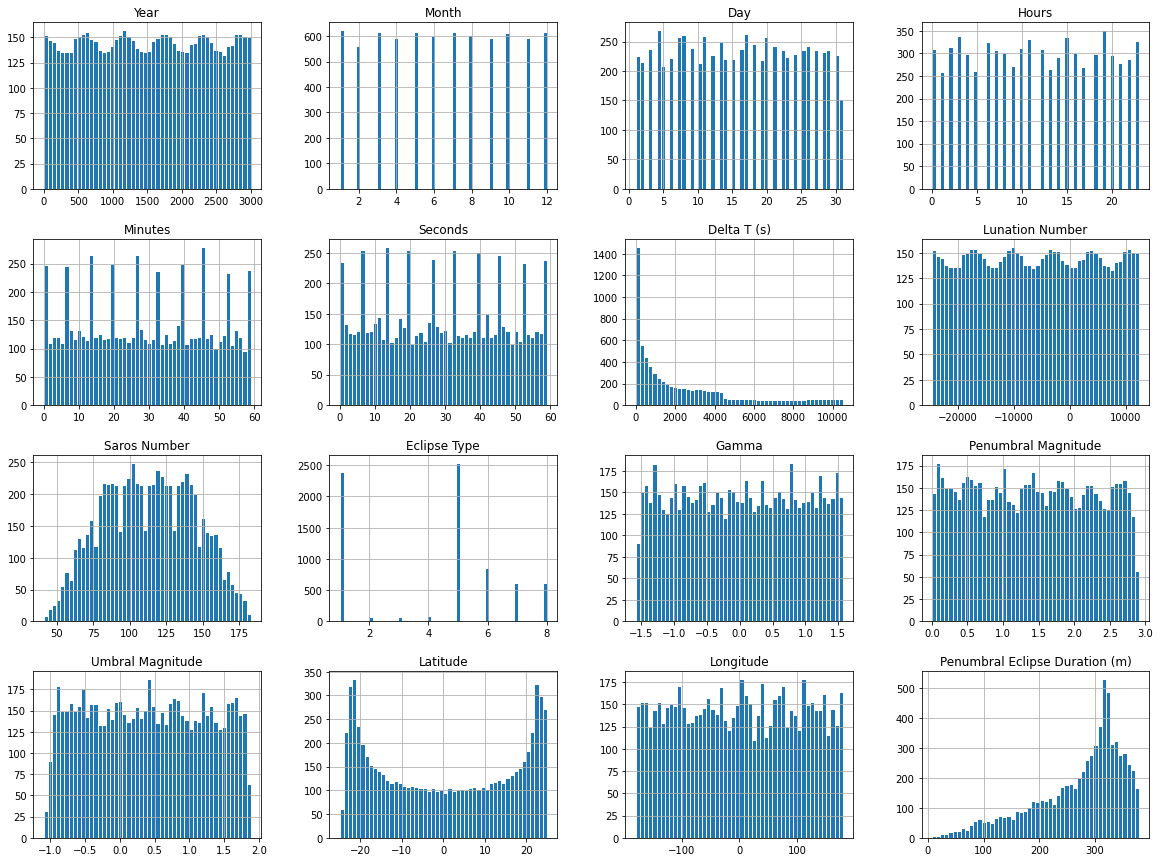

In [135]:
%matplotlib inline

import matplotlib.pyplot as plt

lunar.hist(bins = 50, figsize = (20, 15), ec = 'white')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba031a3240>,
      dtype=object)

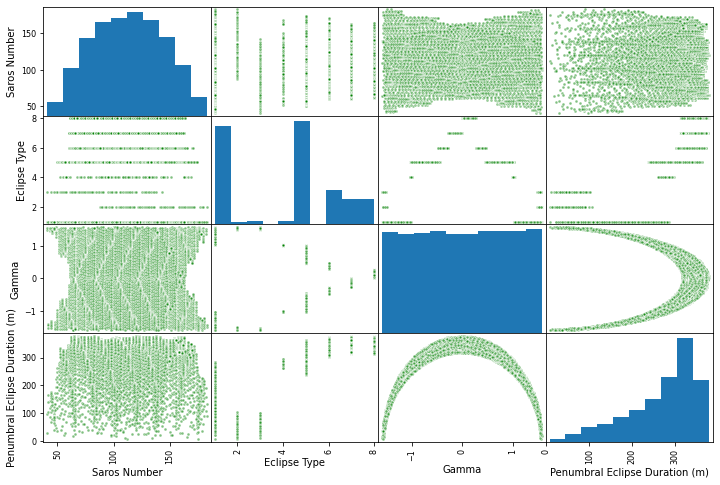

In [137]:
from pandas.plotting import scatter_matrix

attributes = ['Saros Number', 'Eclipse Type', 'Gamma', 'Penumbral Eclipse Duration (m)']
scatter_matrix(lunar[attributes], figsize = (12, 8), color = 'green',ec = 'white')

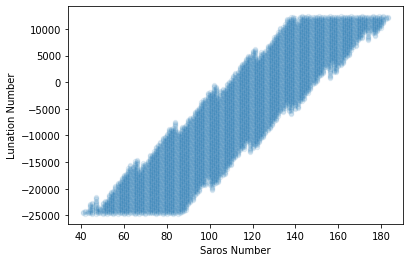

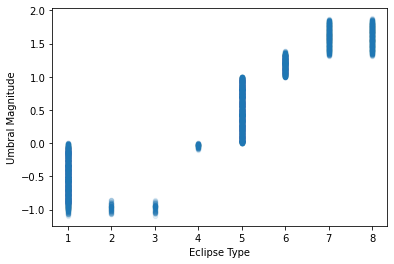

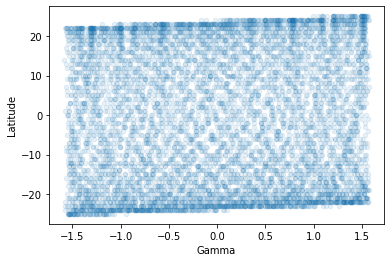

In [124]:
lunar.plot(kind = 'scatter', x = 'Saros Number', y = 'Lunation Number', alpha = 0.1)
lunar.plot(kind = 'scatter', x = 'Eclipse Type', y = 'Umbral Magnitude', alpha = 0.1)
lunar.plot(kind = 'scatter', x = 'Gamma', y = 'Latitude', alpha = 0.1)